# **CUSTOMER CHURN PREDICTION**

**TABLE OF CONTENTS:**

1. Data Understanding
2. Data cleaning
3. Exploratory Data Analysis 
4. Data Preprocessing
5. Model Selection and Evaluation
6. Conclusion

**Importing Libraries**

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [80]:
import warnings
warnings.filterwarnings('ignore')

**LOADING DATASET**

In [81]:
df=pd.read_csv('Telco-Customer-Churn.csv')

In [82]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 1. Data Understanding

In [83]:
df.info()
# total charges is not in correct datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [84]:
df.describe()
# min tenure time is 0 and max is 72

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [85]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [86]:
df.duplicated().sum()

np.int64(0)

In [87]:
df.shape

(7043, 21)

In [88]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# 2. Data Cleaning

In [89]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")

In [90]:
df = df.dropna(subset=['TotalCharges'])

In [91]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [92]:
df.shape

(7032, 21)

# 3. Exploratory Data Analysis

In [93]:
df['gender'].value_counts()

gender
Male      3549
Female    3483
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

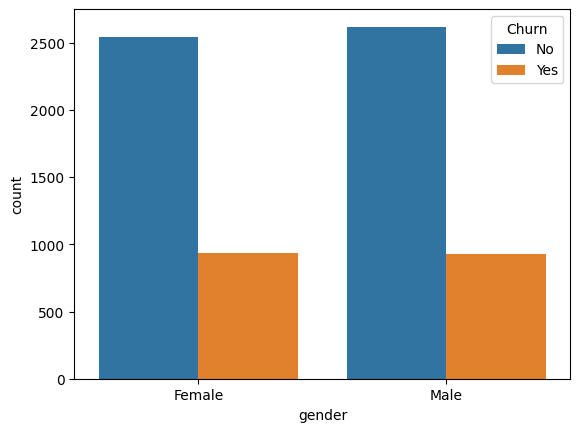

In [94]:
sns.countplot(data=df,x='gender',hue='Churn')

In [95]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

<Axes: xlabel='SeniorCitizen', ylabel='count'>

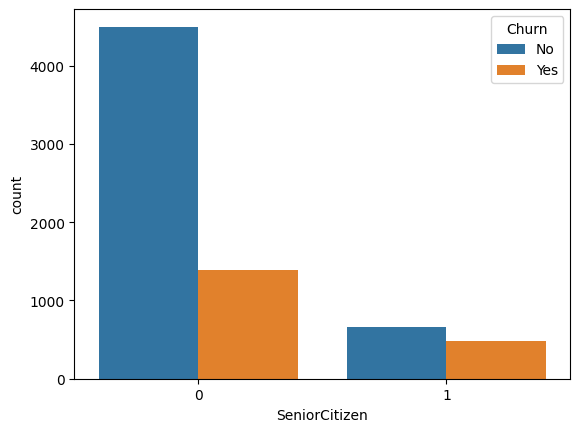

In [96]:
sns.countplot(data=df,x='SeniorCitizen',hue='Churn')
# non senior citizens are more likely to churn

In [97]:
df['Partner'].value_counts()

Partner
No     3639
Yes    3393
Name: count, dtype: int64

<Axes: xlabel='Partner', ylabel='count'>

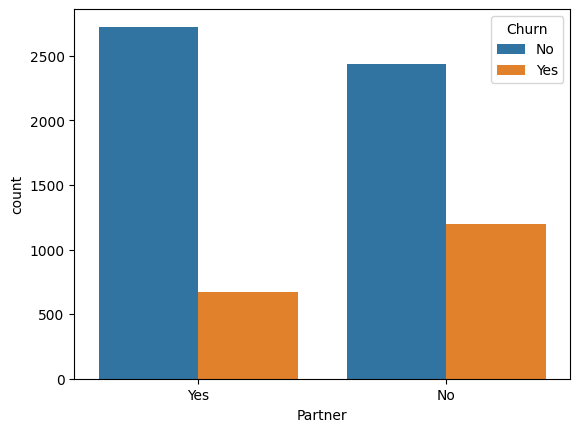

In [98]:
# people with no parteners are more churners
sns.countplot(data=df,x='Partner',hue='Churn')

In [99]:
df['Dependents'].value_counts()

Dependents
No     4933
Yes    2099
Name: count, dtype: int64

<Axes: xlabel='Dependents', ylabel='count'>

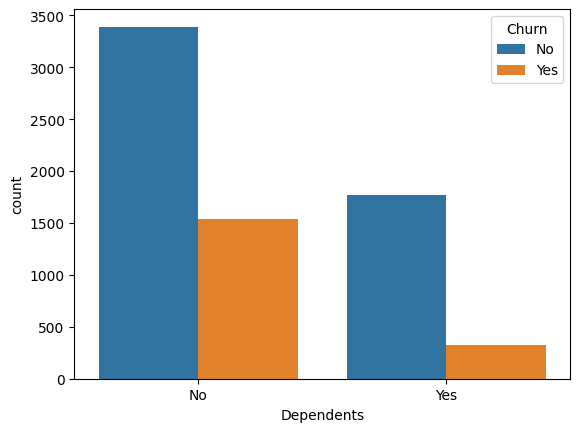

In [100]:
# people with no dependents are more churners
sns.countplot(data=df,x='Dependents',hue='Churn')

In [101]:
df['MultipleLines'].value_counts()

MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64

<Axes: xlabel='MultipleLines', ylabel='count'>

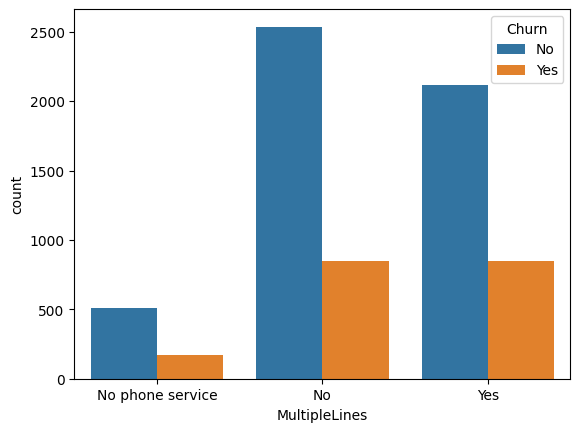

In [102]:
sns.countplot(data=df,x='MultipleLines',hue='Churn')

In [103]:
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], 
                            labels=['0-12','13-24','25-36','37-48','49-60','61-72'])

<Axes: xlabel='tenure_group', ylabel='count'>

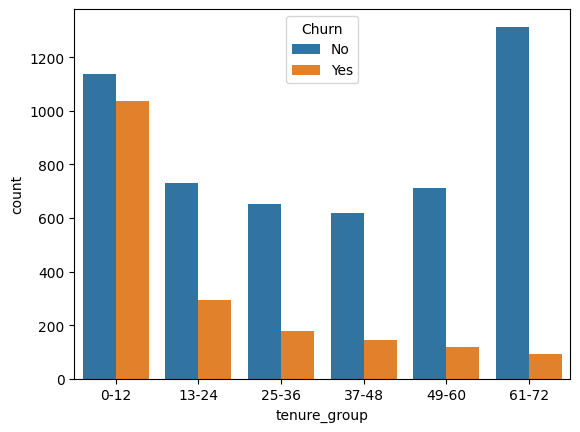

In [104]:
sns.countplot(data=df,x='tenure_group',hue='Churn')
# people from tenure group 0-12 are more churners

In [105]:
df['PhoneService'].value_counts()

PhoneService
Yes    6352
No      680
Name: count, dtype: int64

<Axes: xlabel='PhoneService', ylabel='count'>

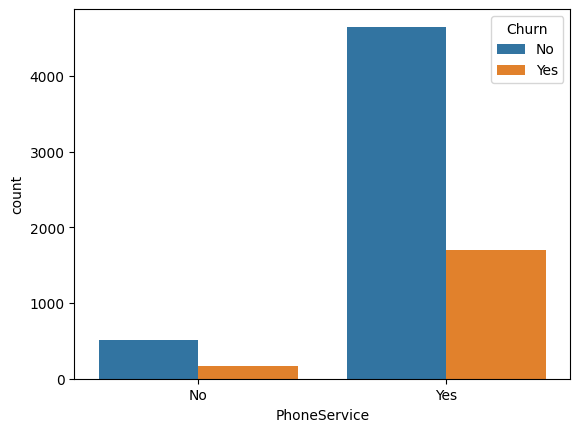

In [106]:
# people with pone service are more likely to churn
sns.countplot(data=df,x='PhoneService',hue='Churn')

In [107]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

<Axes: xlabel='InternetService', ylabel='count'>

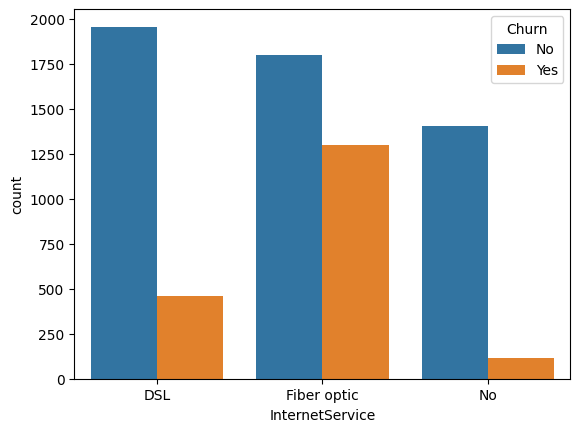

In [108]:
# fibre optics internet service people re more churners then dsl type and then no internet service
sns.countplot(data=df,x='InternetService',hue='Churn')

In [109]:
df['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64

<Axes: xlabel='OnlineSecurity', ylabel='count'>

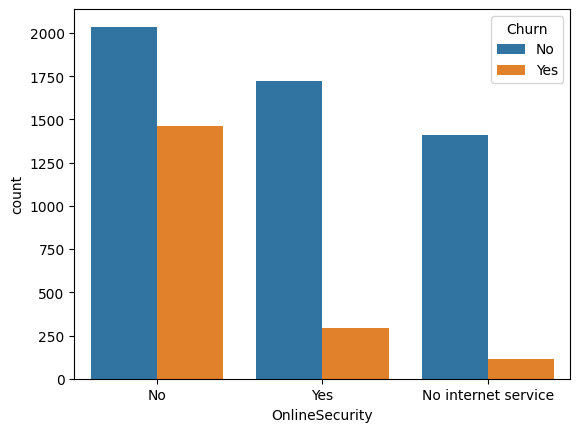

In [110]:
# people with no online security are also more churners
sns.countplot(data=df,x='OnlineSecurity',hue='Churn')

In [111]:
df['OnlineBackup'].value_counts()

OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64

<Axes: xlabel='OnlineBackup', ylabel='count'>

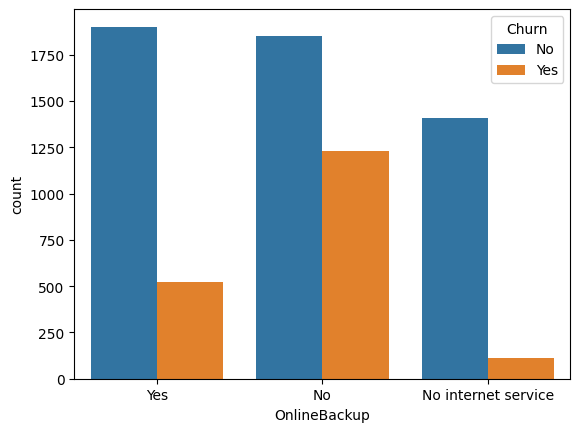

In [112]:
sns.countplot(data=df,x='OnlineBackup',hue='Churn')
# people with no onlinebackup are more churners

In [113]:
df['DeviceProtection'].value_counts()

DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64

<Axes: xlabel='DeviceProtection', ylabel='count'>

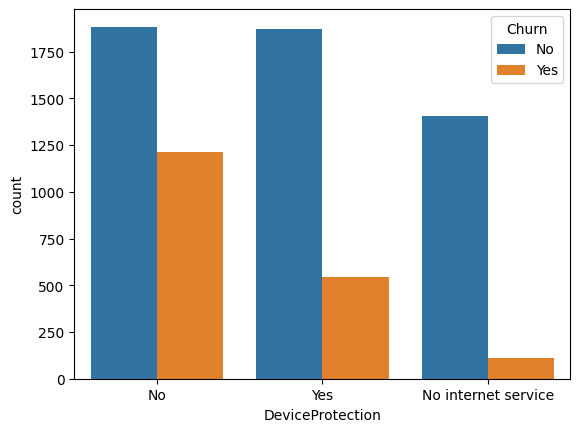

In [114]:
# people with no device protection are more churners
sns.countplot(data=df,x='DeviceProtection',hue='Churn')

In [115]:
df['TechSupport'].value_counts()

TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64

<Axes: xlabel='TechSupport', ylabel='count'>

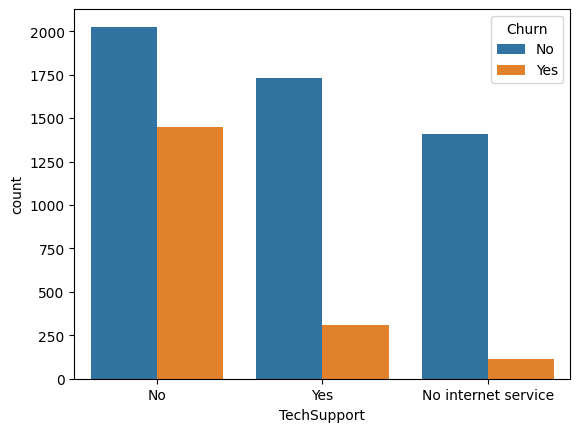

In [116]:
# people with no tech support are more churners
sns.countplot(data=df,x='TechSupport',hue='Churn')

In [117]:
df['StreamingTV'].value_counts()

StreamingTV
No                     2809
Yes                    2703
No internet service    1520
Name: count, dtype: int64

<Axes: xlabel='StreamingTV', ylabel='count'>

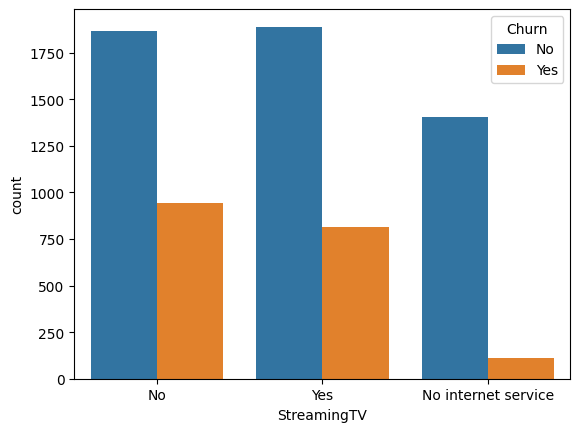

In [118]:
sns.countplot(data=df,x='StreamingTV',hue='Churn')

In [119]:
df['StreamingMovies'].value_counts()

StreamingMovies
No                     2781
Yes                    2731
No internet service    1520
Name: count, dtype: int64

<Axes: xlabel='StreamingMovies', ylabel='count'>

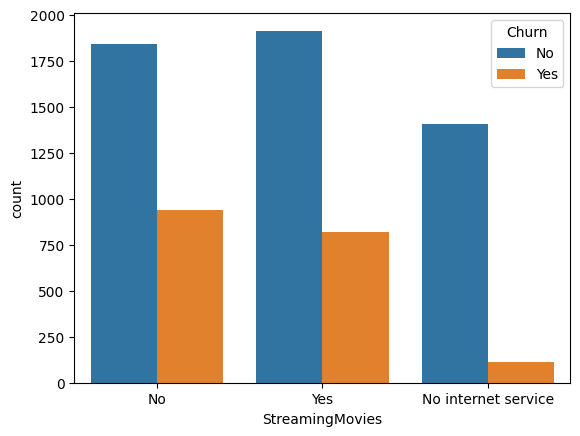

In [120]:
sns.countplot(data=df,x='StreamingMovies',hue='Churn')

In [121]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

<Axes: xlabel='Contract', ylabel='count'>

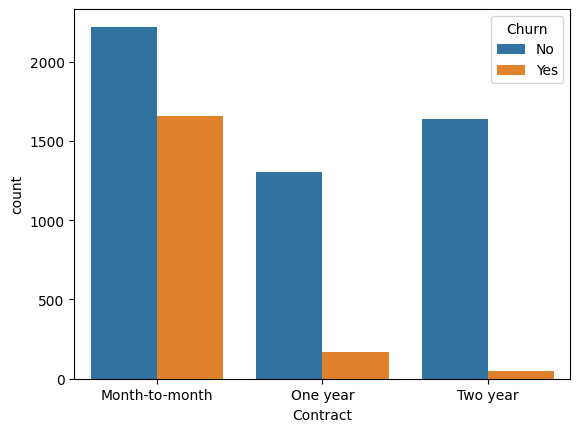

In [122]:
# monthly contract are more likely to churn compared to one yr and 2 yr 
sns.countplot(data=df,x='Contract',hue='Churn')

In [123]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64

<Axes: xlabel='PaymentMethod', ylabel='count'>

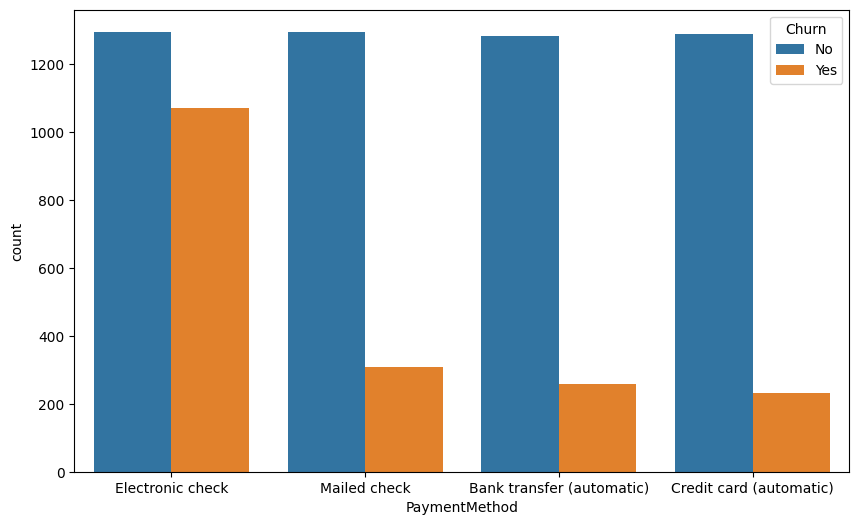

In [124]:
# people using electronic check method are more churners
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='PaymentMethod',hue='Churn')

In [125]:
df['PaperlessBilling'].value_counts()

PaperlessBilling
Yes    4168
No     2864
Name: count, dtype: int64

<Axes: xlabel='PaperlessBilling', ylabel='count'>

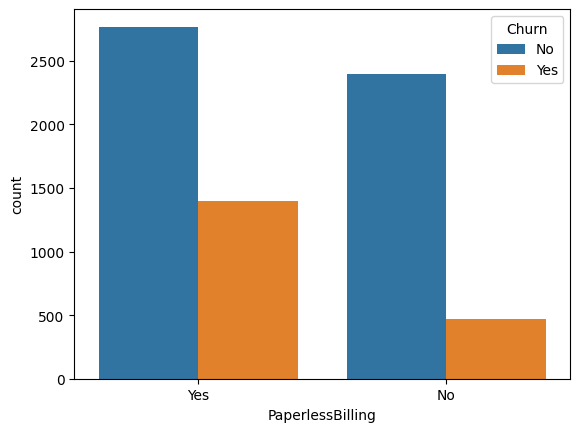

In [126]:
# people with paper less billing are more churners
sns.countplot(data=df,x='PaperlessBilling',hue='Churn')

<Axes: ylabel='TotalCharges'>

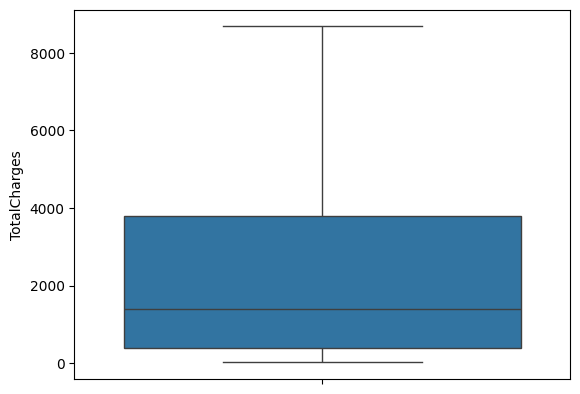

In [127]:
sns.boxplot(data=df['TotalCharges'])

<Axes: ylabel='MonthlyCharges'>

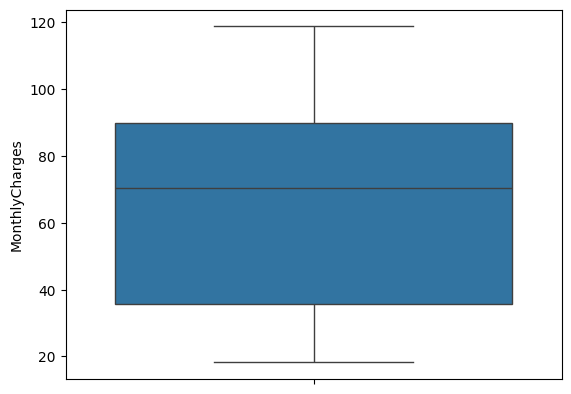

In [128]:
sns.boxplot(data=df['MonthlyCharges'])

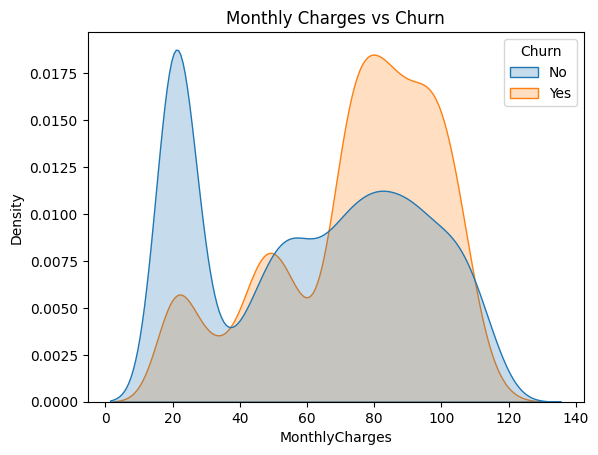

In [129]:
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True, common_norm=False)
plt.title('Monthly Charges vs Churn')
plt.show()

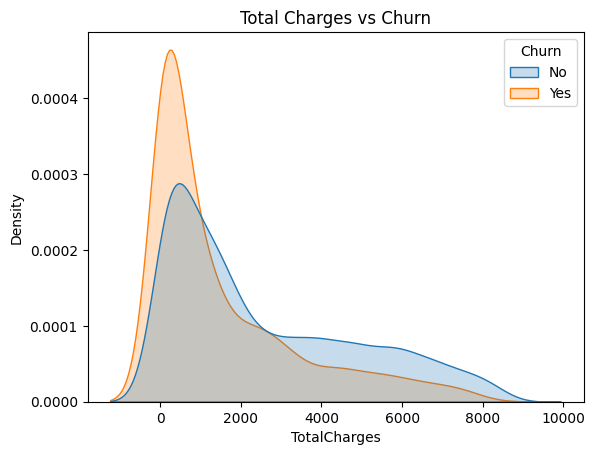

In [130]:
sns.kdeplot(data=df, x='TotalCharges', hue='Churn', fill=True, common_norm=False)
plt.title('Total Charges vs Churn')
plt.show()

# 4. Data Preprocessing

From dataset we concluded-

- Categroical column -  'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies','PaperlessBilling', 'PaymentMethod', 'Churn', 'contract'

- Numerical column - 'MonthlyCharges', 'TotalCharges' ,'tenure'

- Columns that can help in prediction find out using EDA-

  'SeniorCitizen', 'Partner', 'Dependents', 'MonthlyCharges', 'tenure_group', 'TechSupport', 'contract', 'DeviceProtection', 'phoneservice', 'internetservice', 'onlinesecurity','total charges', 'paymentmethod', 'paperlessbiling', 'onlinebackup'.

In [131]:
df.drop(columns=['customerID','StreamingTV','StreamingMovies','gender','MultipleLines','tenure'],axis=1,inplace=True)

In [132]:
# label encoding( gender,'SeniorCitizen','Partner','Dependents',churn)
binary_cols=['Partner','Dependents','Churn','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','PhoneService','PaperlessBilling']

for cols in binary_cols:
    df[cols]= df[cols].map({'Yes': 1, 'No': 0,'No internet service': 2,'No phone service':2,})

In [133]:
df

,SeniorCitizen,Partner,Dependents,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,1,0,0,DSL,0,1,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,0-12
1,0,0,0,1,DSL,1,0,1,0,One year,0,Mailed check,56.95,1889.50,0,25-36
2,0,0,0,1,DSL,1,1,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,0-12
3,0,0,0,0,DSL,1,0,1,1,One year,0,Bank transfer (automatic),42.30,1840.75,0,37-48
4,0,0,0,1,Fiber optic,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,0-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,DSL,1,0,1,1,One year,1,Mailed check,84.80,1990.50,0,13-24
7039,0,1,1,1,Fiber optic,0,1,1,0,One year,1,Credit card (automatic),103.20,7362.90,0,61-72
7040,0,1,1,0,DSL,1,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0,0-12
7041,1,1,0,1,Fiber optic,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1,0-12


In [134]:
from sklearn.preprocessing import OneHotEncoder

In [135]:
encoded_cols=['Contract', 'InternetService','PaymentMethod','tenure_group']

In [136]:
oe=OneHotEncoder(drop='first')

In [137]:
oe1=oe.fit_transform(df[encoded_cols]).toarray()

In [138]:
encoded_df = pd.DataFrame(oe1, columns=oe.get_feature_names_out(encoded_cols))

In [139]:
encoded_df=encoded_df.astype(int)

In [140]:
df = df.drop(columns=encoded_cols).reset_index(drop=True)
df = pd.concat([df, encoded_df], axis=1)

In [141]:
df

,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,MonthlyCharges,...,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,1,0,0,0,1,0,0,1,29.85,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,1,0,1,0,0,56.95,...,0,0,0,0,1,0,1,0,0,0
2,0,0,0,1,1,1,0,0,1,53.85,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,1,1,0,42.30,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,1,70.70,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,1,1,1,1,0,1,1,1,84.80,...,0,0,0,0,1,1,0,0,0,0
7028,0,1,1,1,0,1,1,0,1,103.20,...,1,0,1,0,0,0,0,0,0,1
7029,0,1,1,0,1,0,0,0,1,29.60,...,0,0,0,1,0,0,0,0,0,0
7030,1,1,0,1,0,0,0,0,1,74.40,...,1,0,0,0,1,0,0,0,0,0


# 5. Model Selection and Evaluation

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X=df.drop('Churn',axis=1)
y=df['Churn']

In [144]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [145]:
y_test.value_counts()

Churn
0    1033
1     374
Name: count, dtype: int64

In [146]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [147]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score,classification_report,f1_score,recall_score,precision_score
from sklearn.model_selection import cross_val_score

In [148]:
Models = {
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "LR": LogisticRegression(),
    "XGB":  XGBClassifier()
}

In [149]:
for key, classifier in Models.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifier: ", classifier.__class__.__name__, "has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifier:  DecisionTreeClassifier has a training score of 73.0 % accuracy score
Classifier:  RandomForestClassifier has a training score of 78.0 % accuracy score
Classifier:  LogisticRegression has a training score of 80.0 % accuracy score
Classifier:  XGBClassifier has a training score of 78.0 % accuracy score


In [150]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict

In [151]:
# using gridsearch cv to find best hyperparameters

param_DT= {
    'criterion': ['gini', 'entropy'],'max_depth': [3, 5, 7, 9],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 5, 10], 
    'class_weight': [None, 'balanced']  
}

param_RF= {
    'n_estimators': [100, 150],'max_depth': [5, 10, None],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 5, 10],'max_features': ['sqrt', 'log2'],         
    'class_weight': [None, 'balanced'],'bootstrap': [True, False]              
}

param_LR={
    'penalty':['l1','l2'],'C':[0.01,0.1,1,10],'solver':['liblinear'],'class_weight':[None,'balanced'],'max_iter':[1000]
}

param_XGB= {
    'n_estimators': [100, 150],'max_depth': [3, 5, 7],'learning_rate': [0.01, 0.1, 0.2],'subsample': [0.8, 1.0],'colsample_bytree': [0.8, 1.0],         
    'scale_pos_weight': [1, 3, 5]           
}



**Hyperparameter Tunig using GridSearch CV**

In [152]:
grid_search_DT = GridSearchCV(
    estimator=Models["DT"],
    param_grid=param_DT,
    scoring='f1',   
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search_DT.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1', verbose=1)

In [153]:
grid_search_RF = GridSearchCV(
    estimator=Models["RF"],
    param_grid=param_RF,
    scoring='f1',   
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search_RF.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'class_weight': [None, 'balanced'],
                         'max_depth': [5, 10, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150]},
             scoring='f1', verbose=1)

In [154]:
grid_search_LR = GridSearchCV(
    estimator=Models["LR"],
    param_grid=param_LR,
    scoring='f1',   
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search_LR.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'], 'max_iter': [1000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='f1', verbose=1)

In [155]:
grid_search_XGB = GridSearchCV(
    estimator=Models["XGB"],
    param_grid=param_XGB,
    scoring='f1',   
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search_XGB.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 150],
                         'scale_pos_weight': [1, 3, 5],
                         'subsample': [0.8, 1.0]},
             scoring='f1', verbose=1)

In [156]:
best_DT = grid_search_DT.best_estimator_
best_RF = grid_search_RF.best_estimator_
best_LR = grid_search_LR.best_estimator_
best_XGB =grid_search_XGB.best_estimator_

In [157]:
y_pred_DT = best_DT.predict(X_test)
y_pred_RF = best_RF.predict(X_test)
y_pred_LR = best_LR.predict(X_test)
y_pred_XGB = best_XGB.predict(X_test)

**Cross Validation Score**

In [166]:
DT_score = cross_val_score(best_DT, X_train, y_train, cv=5)
print(' Decision Tree Cross Validation Score: ', round(DT_score.mean() * 100, 2).astype(str) + '%')

RF_score = cross_val_score(best_RF, X_train, y_train, cv=5)
print('Random Forest Cross Validation Score', round(RF_score.mean() * 100, 2).astype(str) + '%')

LR_score = cross_val_score(best_LR, X_train, y_train, cv=5)
print('Logistic Regression Classifier Cross Validation Score', round(LR_score.mean() * 100, 2).astype(str) + '%')

XGB_score = cross_val_score(best_XGB, X_train, y_train, cv=5)
print('XGB Classifier Cross Validation Score', round(XGB_score.mean() * 100, 2).astype(str) + '%')

 Decision Tree Cross Validation Score:  74.54%
Random Forest Cross Validation Score 76.48%
Logistic Regression Classifier Cross Validation Score 75.11%
XGB Classifier Cross Validation Score 75.41%


**Roc-Auc Score**

In [159]:
print('Decision Tree: ', roc_auc_score(y_test, y_pred_DT))
print('Random Forest:', roc_auc_score(y_test, y_pred_RF))
print('Logistic Regression:', roc_auc_score(y_test, y_pred_LR))
print('XGB Classifier: ', roc_auc_score(y_test, y_pred_XGB))

Decision Tree:  0.7539252786391333
Random Forest: 0.7548234465835969
Logistic Regression: 0.7410636172096225
XGB Classifier:  0.76107050230107


**ROC Curve**

In [160]:
from sklearn.metrics import roc_curve

In [161]:
DT_fpr, DT_tpr, DT_thresold = roc_curve(y_test,y_pred_DT)
RF_fpr, RF_tpr, RF_threshold = roc_curve(y_test, y_pred_RF)
LR_fpr, LR_tpr, LR_threshold = roc_curve(y_test, y_pred_LR)
XGB_fpr, XGB_tpr, XGB_threshold = roc_curve(y_test, y_pred_XGB)

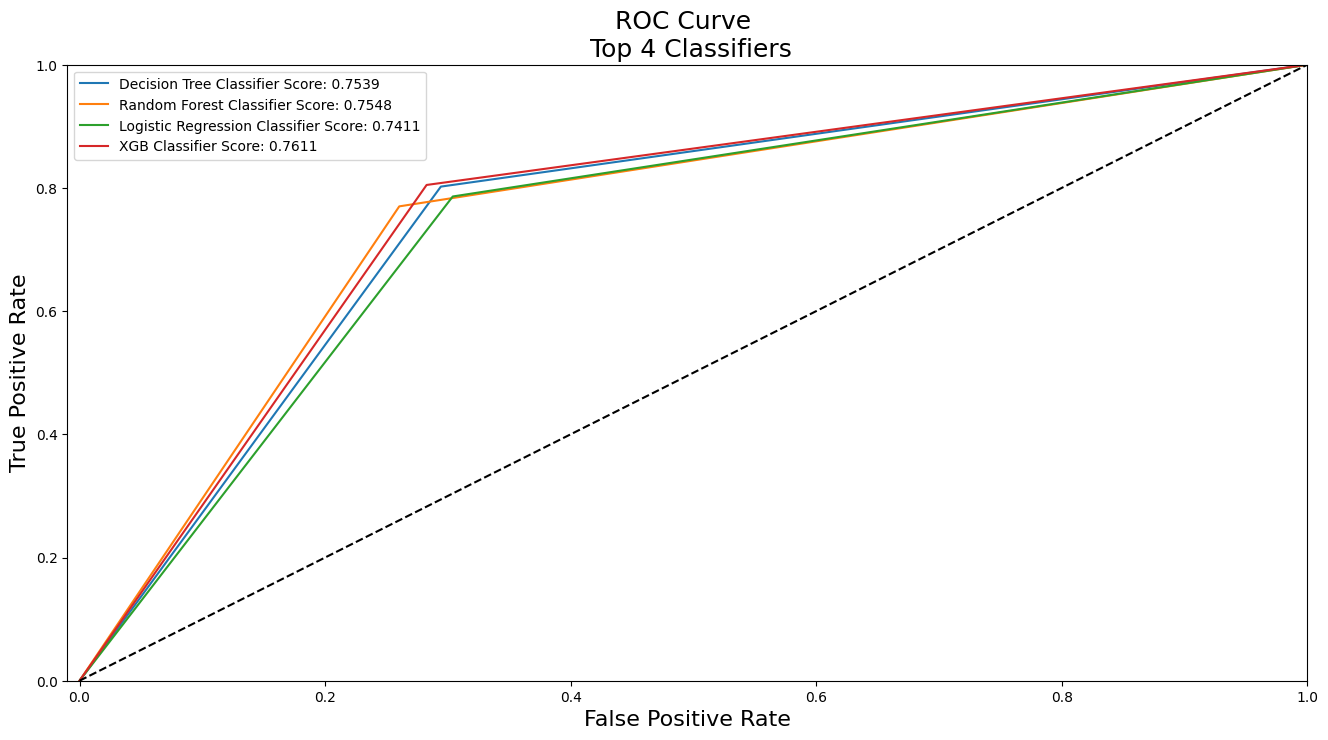

In [162]:
plt.figure(figsize=(16,8))
plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
plt.plot(DT_fpr, DT_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_DT)))
plt.plot(RF_fpr, RF_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_RF)))
plt.plot(LR_fpr, LR_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_LR)))
plt.plot(XGB_fpr, XGB_tpr, label='XGB Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_XGB)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
#plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                #arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.legend()

**Accuracy Score**

In [163]:
print('Decision Tree: ', accuracy_score(y_test, y_pred_DT))
print('Random Forest:', accuracy_score(y_test, y_pred_RF))
print('Logistic Regression:', accuracy_score(y_test, y_pred_LR))
print('XGB Classifier: ', accuracy_score(y_test, y_pred_XGB))

Decision Tree:  0.7313432835820896
Random Forest: 0.7476901208244492
Logistic Regression: 0.7199715707178393
XGB Classifier:  0.7405828002842928


**Confusion Matrix**

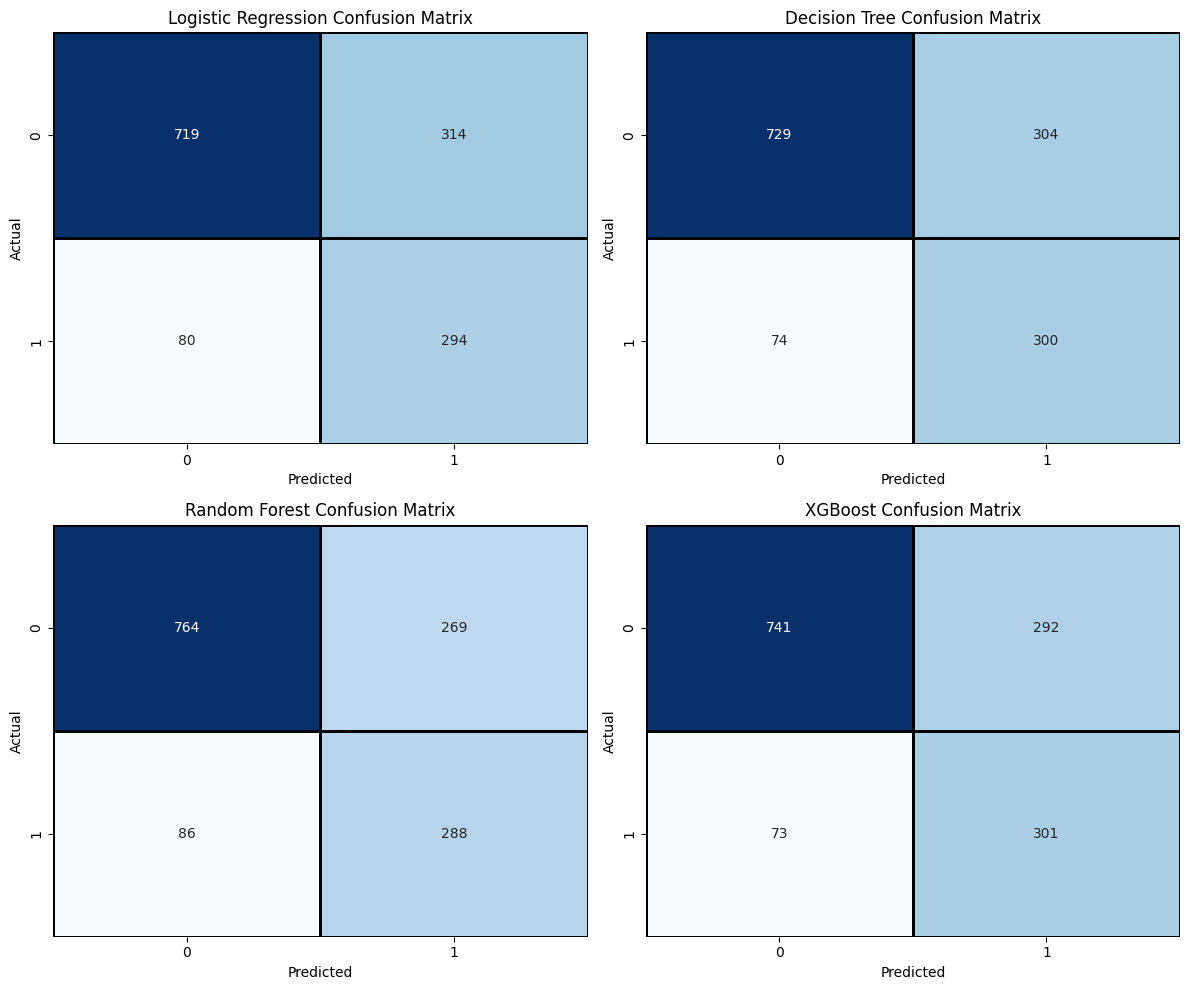

In [164]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
predictions = [y_pred_LR, y_pred_DT, y_pred_RF, y_pred_XGB]
axes = axes.ravel() 

for i in range(4):
    cm = confusion_matrix(y_test, predictions[i])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], cbar=False, linecolor='k', linewidths=1)
    axes[i].set_title(f'{model_names[i]} Confusion Matrix', fontsize=12)
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

**Classification report**

In [165]:
print('Logistic Regression:')
print(classification_report(y_test, y_pred_LR))

print('Decision Tree:')
print(classification_report(y_test, y_pred_DT))

print('Random Forest:')
print(classification_report(y_test, y_pred_RF))

print('XGB Classifier:')
print(classification_report(y_test, y_pred_XGB))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.70      0.78      1033
           1       0.48      0.79      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.74      1407

Decision Tree:
              precision    recall  f1-score   support

           0       0.91      0.71      0.79      1033
           1       0.50      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.75      1407

Random Forest:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1033
           1       0.52      0.77      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.80

# 6. Conclusion

Although all models achieved similar accuracy (ranging from 71% to 75%), **accuracy alone is not a reliable metric** for churn prediction due to class imbalance (i.e., fewer customers actually churn). Therefore, I used more informative evaluation metrics such as:

The **XGBoost Classifier** was selected as the final model because it achieved the best overall performance:

- **Accuracy**: 74.0%  
- **Recall (Churn class)**: 80%  
- **F1-Score (Churn class)**: 0.62  
- **ROC-AUC**: **0.76** (highest among all models)  
- **Cross-validation score**: 75.41% (consistent generalization performance)

These results indicate that XGBoost is not only good at detecting churners (high recall) but also avoids many false alarms (reasonable precision), making it the most balanced and reliable model for this task.


- key takways-

   - Class imbalance requires careful metric selection; recall, F1, and AUC are more meaningful than accuracy alone.
   - XGBoost consistently outperformed others on critical metrics and is suitable for identifying at-risk customers.
   - This model can now be used to support business decisions, such as targeting high-risk customers with retention strategies.
